In [1]:
import scipy.stats as sct
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgbm
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

Nos dados "train2.csv" e "test2.csv", são dados que foram normalizados. Ou seja, foi feito o tratamento na disersão desses dados.

## Arquivos foram utilizados o normalizador 

In [3]:
train = pd.read_csv('train2.csv', sep=',')
train

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1.140045,0.006656,0.999441,1.435552,-1.248792,1.004412,0.012261,0.000000,0.001051,0.022070,...,0.921522,0.000050,0.000020,0.000222,0.000008,0.000089,0.000002,0.000046,0.139706,1
1,-0.785862,0.041707,0.753009,-0.157886,0.494177,-1.472693,0.000000,0.006446,0.001137,0.023887,...,-1.085417,-0.378779,0.000027,0.000293,0.000007,-0.378779,-0.378779,0.000056,0.106618,0
2,-1.336121,0.022356,0.584115,-0.506950,-1.461444,-0.668015,0.009172,0.000000,0.001720,0.036113,...,-1.085417,0.000115,0.000029,0.000562,0.000011,-0.572651,-0.572651,0.000219,0.242647,0
3,1.415175,0.022230,0.998066,-1.269693,0.808350,-0.412675,0.007410,0.005700,0.000570,0.007980,...,-1.085417,0.000201,0.000025,0.000542,0.000013,0.000207,0.000001,0.000084,0.132353,0
4,-0.373168,0.016482,0.847328,1.434137,0.146364,-1.163436,0.005993,0.000000,0.001124,0.023599,...,0.920939,0.000085,0.000022,0.000339,0.000008,-0.374218,-0.374218,0.000171,0.132353,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,-0.785862,0.013527,0.870913,1.367196,-1.331991,0.657516,0.010752,0.008324,0.001041,0.000000,...,-1.085417,0.000024,0.000013,0.000302,0.000006,-0.346492,-0.346492,0.000158,0.147059,0
14119,1.277610,0.047917,0.413792,-1.541603,0.249987,-1.472693,0.000000,0.010029,0.000000,0.000000,...,-1.085417,0.000110,0.000021,0.000342,0.000007,-0.371075,-0.371075,0.000055,0.198529,0
14120,2.378129,0.019307,0.783674,0.861093,1.052540,-0.838920,0.015358,0.011847,0.001316,0.006143,...,-1.085417,0.000089,0.000018,0.000408,0.000004,-0.438348,-0.438348,0.000174,0.158088,0
14121,-0.785862,0.061965,0.146209,0.439628,-0.573590,1.022723,0.024368,0.018798,0.000696,0.043863,...,0.921039,0.000265,0.000070,0.000474,0.000029,-0.695539,-0.695539,0.000184,0.128676,0


In [4]:
test = pd.read_csv('test2.csv', sep=',')
test

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
0,0,-0.647656,0.064236,0.689771,1.373140,-1.454428,-0.181271,0.013765,0.000000,0.000510,...,0.000103,0.925267,0.000085,0.000025,0.000503,0.000009,-0.509299,-0.509299,0.000090,0.253676
1,2,-0.509642,0.062096,0.712631,-0.744737,-0.130368,-0.542260,0.017249,0.000000,0.001478,...,0.000036,0.924706,0.000107,0.000071,0.000440,0.000019,-0.492336,-0.492336,0.000072,0.099265
2,4,-0.647656,0.030555,0.168745,-1.092961,-1.344491,0.444850,0.022916,0.016666,0.000694,...,0.000226,0.925329,0.000230,0.000051,0.000646,0.000015,-0.693731,-0.693731,0.000204,0.136029
3,7,-0.785670,0.035908,0.283879,-1.451597,0.650310,-1.309105,0.023713,0.000000,0.002033,...,0.000089,-1.081126,0.000166,0.000107,0.000669,0.000015,-0.676838,-0.676838,0.000199,0.220588
4,15,-0.785670,0.053717,0.794250,0.746077,0.012010,-0.511667,0.003837,0.000000,0.001279,...,0.000096,0.924676,0.000108,0.000034,0.000403,0.000009,-0.425902,-0.425902,0.000150,0.113971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21178,35297,-0.785670,0.061812,0.716239,-0.190863,1.040199,-0.863478,0.017170,0.013246,0.001472,...,0.000073,-1.081126,0.000160,0.000065,0.000475,0.000019,-0.490084,-0.490084,0.000159,0.253676
21179,35298,1.146528,0.010485,0.293570,-0.040480,-0.899633,-0.623839,0.014899,0.011036,0.001655,...,0.000099,0.924968,0.000127,0.000029,0.000519,0.000009,-0.551272,-0.551272,0.000049,0.209559
21180,35300,-0.785670,0.037056,0.859649,0.144545,-0.727818,0.139947,0.010293,0.000000,0.000882,...,0.000070,0.926183,0.000053,0.000009,0.000219,0.000006,-0.293804,-0.293804,0.000061,0.161765
21181,35302,-0.647656,0.000000,0.000000,-1.489243,0.616368,-0.079297,0.024718,0.000000,0.002119,...,0.000073,-1.081126,0.000106,0.000023,0.000629,0.000009,-0.705535,-0.705535,0.000000,0.246324


In [38]:
pd.options.mode.chained_assignment = None
# criando dataset auxiliar
train_aux = train.tail(200)

# eliminando valores de df_teste do dataset original
train_model = train.drop(index = train_aux.index)

# arrumando index de df_teste
train_aux.reset_index(inplace = True)
train_aux.drop('index', axis = 1, inplace = True)

In [40]:
# obtendo o novo tamanho do dataframe
print('DataFrame principal:\n')
print('Número de quantidade de dados:\t {}'.format(train_model.shape[0]))
print('Número de variáveis/atributos:\t {}\n'.format(train_model.shape[1]))

# obtendo o tamanho do dataframe auxiliar
print('DataFrame de teste:\n')
print('Número de quantidade de dados:\t {}'.format(train_aux.shape[0]))
print('Número de variáveis/atributos:\t {}'.format(train_aux.shape[1]))

DataFrame principal:

Número de quantidade de dados:	 13923
Número de variáveis/atributos:	 69

DataFrame de teste:

Número de quantidade de dados:	 200
Número de variáveis/atributos:	 69


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
X = train.drop('y', axis=1)
y = train['y']

SEED = 42
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print('O dataset de treino possui {} registros e o de treino {} registros.'
       .format(X_train.shape[0], X_test.shape[0]))

O dataset de treino possui 11298 registros e o de treino 2825 registros.


In [30]:
%%time
np.random.seed(SEED)
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train,y_train)
predict = dtree.predict(X_test)
accuracy = accuracy_score(y_test, predict) * 100
print('\n')
print ("A acurácia foi de {:.2f}%.".format(accuracy))




A acurácia foi de 84.57%.
CPU times: user 199 ms, sys: 6.11 ms, total: 205 ms
Wall time: 203 ms


In [31]:
print(classification_report(y_test,predict))
print('\n')
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2228
           1       0.71      0.45      0.55       597

    accuracy                           0.85      2825
   macro avg       0.79      0.70      0.73      2825
weighted avg       0.83      0.85      0.83      2825



[[2118  110]
 [ 326  271]]


In [34]:
np.random.seed(SEED)
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
predict = dtree.predict(X_test)
accuracy = accuracy_score(y_test, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))
print('\n')
print(classification_report(y_test,predict))
print('\n')
print(confusion_matrix(y_test,predict))

A acurácia foi de 84.21%.


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2228
           1       0.63      0.62      0.62       597

    accuracy                           0.84      2825
   macro avg       0.76      0.76      0.76      2825
weighted avg       0.84      0.84      0.84      2825



[[2010  218]
 [ 228  369]]


* ROdar os dados de validação

In [43]:
X_news = train_aux.drop('y', axis = 1)
y_news = train_aux['y']

predict = dtree.predict(X_news)

accuracy = accuracy_score(y_news, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))

A acurácia foi de 90.00%.


## TREINAR OS DADOS COM CROSS VALIDATION

### Primeira Etapa

In [44]:
# divisao entre treino e teste do dataframe original
from sklearn.model_selection import train_test_split

SEED = 23
np.random.seed(SEED)

X = train.drop('y', axis = 1)
y = train['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)

print('O dataset de treino possui {} registros e o de treino {} registros.'.format(X_train.shape[0], X_test.shape[0]))

O dataset de treino possui 11298 registros e o de treino 2825 registros.


### Segunda Etapa

In [45]:
%%time
from sklearn.model_selection import cross_val_score

SEED = 42
np.random.seed(SEED)

dtree = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(dtree, X_train, y_train, cv = 5, scoring = 'accuracy')


def intervalo(results):
  mean = results.mean()
  dv = results.std()
  print('Acurácia média: {:.2f}%'.format(mean*100))
  print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo(results)

Acurácia média: 85.43%
Intervalo de acurácia: [84.11% ~ 86.75%]
CPU times: user 1.05 s, sys: 31.7 ms, total: 1.08 s
Wall time: 1.08 s


In [48]:
%%time
from sklearn.model_selection import KFold

np.random.seed(SEED)

cv = KFold(n_splits = 5, shuffle = True)

dtree = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(dtree, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 85.42%
Intervalo de acurácia: [84.21% ~ 86.64%]
CPU times: user 1.05 s, sys: 28.3 ms, total: 1.08 s
Wall time: 1.08 s


In [49]:
from sklearn.model_selection import StratifiedKFold

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

dtree = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(dtree, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 85.44%
Intervalo de acurácia: [84.22% ~ 86.66%]


### TERCEIRO PASSO

In [50]:
%%time
max_depth = [3, 2, 4, 5, 6, 7]

for item in max_depth:
  np.random.seed(SEED)
  cv = StratifiedKFold(n_splits = 5, shuffle = True)
  dtree = DecisionTreeClassifier(max_depth=item)
  results = cross_val_score(dtree, X_train, y_train, cv = cv, scoring = 'accuracy')
  mean = results.mean()
  dv = results.std()
  print('Acurácia média - Max Depth {}: {:.2f}%'.format(item, mean*100))
  print('Intervalo de acurácia - Max Depth {}: [{:.2f}% ~ {:.2f}%]\n'.format(item, (mean - 2*dv)*100, (mean + 2*dv)*100))

Acurácia média - Max Depth 3: 85.44%
Intervalo de acurácia - Max Depth 3: [84.22% ~ 86.66%]

Acurácia média - Max Depth 2: 85.41%
Intervalo de acurácia - Max Depth 2: [84.05% ~ 86.78%]

Acurácia média - Max Depth 4: 85.60%
Intervalo de acurácia - Max Depth 4: [84.79% ~ 86.41%]

Acurácia média - Max Depth 5: 85.89%
Intervalo de acurácia - Max Depth 5: [84.93% ~ 86.85%]

Acurácia média - Max Depth 6: 85.48%
Intervalo de acurácia - Max Depth 6: [83.84% ~ 87.13%]

Acurácia média - Max Depth 7: 85.12%
Intervalo de acurácia - Max Depth 7: [83.83% ~ 86.41%]

CPU times: user 9.5 s, sys: 150 ms, total: 9.65 s
Wall time: 9.66 s


## TESTAR NOVOS MODELOS

In [141]:
%%time
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = DecisionTreeClassifier(max_depth=5)
model_svc = SVC()
model_log = LogisticRegression(solver='liblinear')
model_rand = RandomForestClassifier(n_estimators=100)
model_gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5)
model_light = lgbm.LGBMClassifier()


models = [model, model_svc, model_log, model_rand, model_gbc, model_light]
name = ['Árvore de Decisão', 'SVC', 'Regressão Logística', 'Random Forest', 'GradientBoosting', 'Lightgbm']

count = 0
for item in models:
  np.random.seed(SEED)
  results = cross_val_score(item, X_train, y_train, cv = cv, scoring = 'accuracy')
  mean = results.mean()
  dv = results.std()
  print('Acurácia média - Modelo {}: {:.2f}%'.format(name[count], mean*100))
  print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'.format(name[count], (mean - 2*dv)*100, (mean + 2*dv)*100))
  count += 1

Acurácia média - Modelo Árvore de Decisão: 85.89%
Intervalo de acurácia - Modelo Árvore de Decisão: [84.93% ~ 86.85%]

Acurácia média - Modelo SVC: 82.28%
Intervalo de acurácia - Modelo SVC: [81.34% ~ 83.22%]

Acurácia média - Modelo Regressão Logística: 82.08%
Intervalo de acurácia - Modelo Regressão Logística: [81.21% ~ 82.94%]

Acurácia média - Modelo Random Forest: 85.98%
Intervalo de acurácia - Modelo Random Forest: [85.13% ~ 86.83%]

Acurácia média - Modelo GradientBoosting: 86.89%
Intervalo de acurácia - Modelo GradientBoosting: [85.83% ~ 87.95%]

Acurácia média - Modelo Lightgbm: 86.71%
Intervalo de acurácia - Modelo Lightgbm: [85.84% ~ 87.57%]

CPU times: user 4min 57s, sys: 1.73 s, total: 4min 59s
Wall time: 4min 43s


### Quarta etapa: verificar a Precisão e o Recall do modelo

#### PRECISÃO

In [142]:
%%time
def intervalo_prec(results):
  mean = results.mean()
  dv = results.std()
  print('Precisão média: {:.2f}%'.format(mean*100))
  print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_gbc
results = cross_val_score(model_gbc, X_train, y_train, cv = cv, scoring = 'precision')
intervalo_prec(results)

Precisão média: 73.67%
Intervalo de Precisão: [69.78% ~ 77.56%]
CPU times: user 3min 5s, sys: 196 ms, total: 3min 5s
Wall time: 3min 6s


#### RECALL

In [143]:
%%time
def intervalo_recall(results):
  mean = results.mean()
  dv = results.std()
  print('Recall médio: {:.2f}%'.format(mean*100))
  print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_gbc
results = cross_val_score(model_gbc, X_train, y_train, cv = cv, scoring = 'recall')
intervalo_recall(results)

Recall médio: 54.56%
Intervalo de Recall: [52.25% ~ 56.87%]
CPU times: user 2min 59s, sys: 20.8 ms, total: 2min 59s
Wall time: 2min 59s


### Trade off: Precisão ou recall

- OBS: Lembrando que na competição do Kaggle, os critérios de desempate são: F1-score e Recall. 

Com base nessa informação, o nosso trade off, sempre será visando aumentar o nosso recall. 

Porém o nosso F1 Score, é uma média harmônica entre precisão e recall. Ou seja, se eu aumentar muito o recall, a ponto de desbalancear muito as previsões, meu F1 Score irá cair muito. 

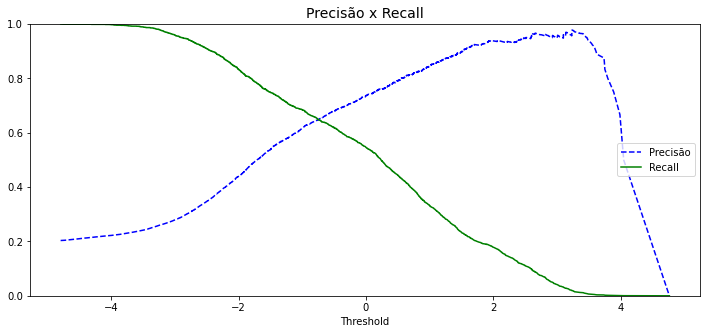

CPU times: user 2min 57s, sys: 194 ms, total: 2min 58s
Wall time: 2min 58s


In [144]:
%%time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_gbc
y_scores = cross_val_predict(model_gbc, X_train, y_train, cv = cv, method = 'decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,5))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 14)

plt.show()


In [174]:
from sklearn.metrics import precision_score, recall_score

y_train_pred_recall_90 = (y_scores > -0.81)

print('Nova precisão: {:.4f}'.format(precision_score(y_train,y_train_pred_recall_90)))
print('Novo recall: {:.4f}'.format(recall_score(y_train,y_train_pred_recall_90)))
print('Novo F1 Score: {:.4f}'.format(f1_score(y_train,y_train_pred_recall_90)))

Nova precisão: 0.6420
Novo recall: 0.6583
Novo F1 Score: 0.6501


CPU times: user 2min 49s, sys: 469 ms, total: 2min 50s
Wall time: 2min 50s


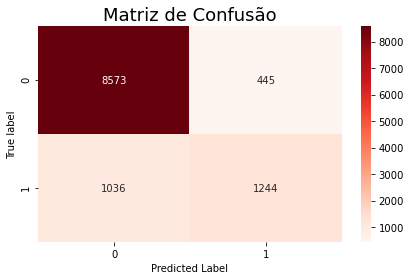

In [175]:
%%time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_gbc
y_pred = cross_val_predict(model_gbc, X_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, ax=ax, fmt='d', cmap='Reds')

ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()


In [177]:
from sklearn.metrics import classification_report

# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.8922    0.9507    0.9205      9018
           1     0.7365    0.5456    0.6269      2280

    accuracy                         0.8689     11298
   macro avg     0.8144    0.7481    0.7737     11298
weighted avg     0.8608    0.8689    0.8612     11298



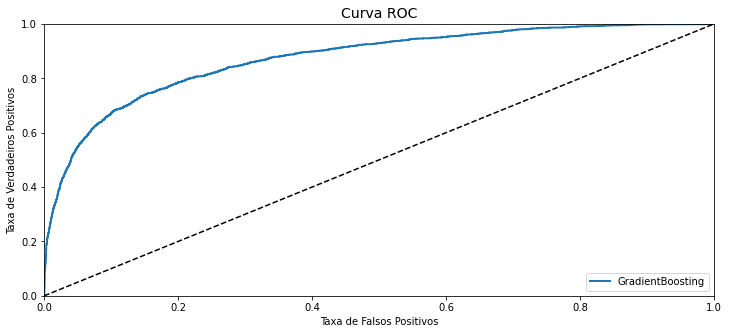

CPU times: user 252 ms, sys: 4 ms, total: 256 ms
Wall time: 258 ms


In [178]:
%%time
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,5))

plt.plot(fpr, tpr, linewidth=2, label = 'GradientBoosting')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)

plt.show()

In [179]:
from sklearn.metrics import roc_auc_score
print('Área sob a curva ROC: {:.4f}'.format(roc_auc_score(y_train, y_scores)))


Área sob a curva ROC: 0.8733


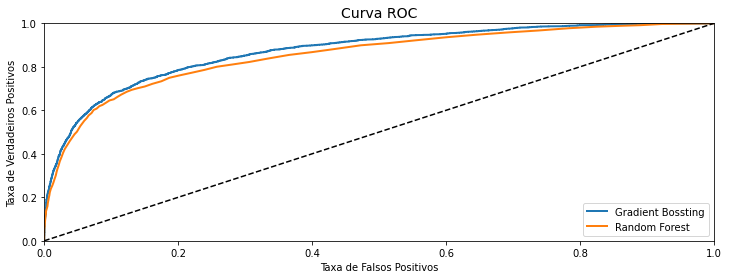

Área sob a curva ROC - Gradient Boosting: 0.8733
Área sob a curva ROC - Random Forest: 0.8531


In [181]:
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_rf = RandomForestClassifier(n_estimators=100)
y_prob_forest = cross_val_predict(model_rf, X_train, y_train, cv = cv, method = 'predict_proba')

y_scores_forest = y_prob_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

fig, ax = plt.subplots(figsize = (12,4))

plt.plot(fpr, tpr, linewidth=2, label = 'Gradient Bossting')
plt.plot(fpr_forest, tpr_forest, linewidth=2, label = 'Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)

plt.show()

print('Área sob a curva ROC - Gradient Boosting: {:.4f}'.format(roc_auc_score(y_train, y_scores)))
print('Área sob a curva ROC - Random Forest: {:.4f}'.format(roc_auc_score(y_train, y_scores_forest)))

## SUBMISSÃO ARQUIVO

In [182]:
#importando novamente o arquivo test
df8 = pd.read_csv('test2.csv', sep=',')

In [184]:
final_model = GradientBoostingClassifier(n_estimators=100, max_depth=5)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
 
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_prob[:,1])))


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9002    0.9521    0.9254      2255
           1     0.7545    0.5825    0.6574       570

    accuracy                         0.8775      2825
   macro avg     0.8274    0.7673    0.7914      2825
weighted avg     0.8708    0.8775    0.8714      2825

AUC: 0.8889



In [186]:
sub = final_model.predict(test)
submission = pd.DataFrame()
submission['id'] = df8['id']
submission['predicted'] = sub

submission.to_csv('submission_gbc.csv', index=False)

In [187]:
!mkdir ~/.kaggle

!cp /home/felipe/Downloads/kaggle.json /home/felipe/.kaggle/kaggle.json

!cd /home/felipe/.kaggle/ && ls

!kaggle datasets list -s 'Porto Seguro'

mkdir: não foi possível criar o diretório “/home/felipe/.kaggle”: Arquivo existe
kaggle.json
ref                                                      title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
aharless/porto-seguro-public-kernel-results              Porto Seguro public kernel results                  3KB  2017-12-01 22:06:38             42         10  0.7647059        
vpaslay/kaggleportosegurosubmissions                     kaggle-porto-seguro-submissions                    34MB  2017-11-12 13:49:51           2059          1  0.4117647        
pushero/porto-seguros-safe-driver-prediction-test-data   Porto Seguro’s Safe Driver Prediction test data    44MB  2017-10-03 09:54:36            154          3  0.47058824       
ogrellier/po

In [189]:
!kaggle competitions submit -c porto-seguro-data-challenge -f submission_gbc.csv -m "SUBMISSÃO 5"

100%|████████████████████████████████████████| 159k/159k [00:02<00:00, 81.1kB/s]
Successfully submitted to Porto Seguro Data Challenge

## RESULTADOS:

Sem a utilização do Pycaret, conseguimos melhorar o nosso modelo final. Saimos de 0.38943 para 0.60690, o que nos colocaria entre os 138° na competição. 

No link abaixo, minha submissão feita diretamente no site no Kaggle, aonde minha pontução com **Private Score** foi de **0.63696** e o **Public Score** de **0.64212**. 

https://www.kaggle.com/felipesembay/modelo-gradientboosting